Import pakages

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Opgave 1

Define constants and parameters

In [31]:
omega_A1 = 0.8
omega_A2 = 0.3
omega_B1 = 1 - omega_A1
omega_B2 = 1 - omega_A2
alpha = 1/3
beta = 2/3
N = 75  # Resolution
x1_grid = np.linspace(0, 1, N)
x2_grid = np.linspace(0, 1, N)

Define

In [32]:
# Utility Functions
def uA(x1, x2):
    return (x1 ** alpha) * (x2 ** (1 - alpha))

def uB(x1, x2):
    return (x1 ** beta) * (x2 ** (1 - beta))

#Initial utilities 
initial_uA = uA(omega_A1, omega_A2)
initial_uB = uB(omega_B1, omega_B2)

Indentify Pareto improvements

In [33]:
pareto_improvements = []  # To store Pareto improvements
for x1 in x1_grid:
    for x2 in x2_grid:
        # Calculate remaining goods for B
        remaining_x1 = 1 - x1
        remaining_x2 = 1 - x2
        if uA(x1, x2) >= initial_uA and uB(remaining_x1, remaining_x2) >= initial_uB:
            pareto_improvements.append((x1, x2))

# Convert to array for plotting
pareto_improvements = np.array(pareto_improvements) 

Generate indifference curves

In [34]:
# Function to generate indifference curves
def generate_indifference_curve(u, utility_function, x_grid, good='x1', alpha=alpha, beta=beta):
    y = []
    for x in x_grid:
        if good == 'x1':
            x1 = x
            # Solve for x2 that keeps utility constant
            x2 = ((u / (x1 ** alpha)) ** (1 / (1 - alpha))) if utility_function == uA else ((u / (x1 ** beta)) ** (1 / (1 - beta)))
        else:
            x2 = x
            # Solve for x1 that keeps utility constant
            x1 = ((u / (x2 ** (1 - alpha))) ** (1 / alpha)) if utility_function == uA else ((u / (x2 ** (1 - beta))) ** (1 / beta))
        y.append(x2)
    return np.array(x_grid), np.array(y)

# Generate indifference curves at the edges of Pareto improvements
uA_edge = uA(omega_A1, omega_A2)  # Utility at initial endowment for A
uB_edge = uB(omega_B1, omega_B2)  # Utility at initial endowment for B

indifference_curve_A = generate_indifference_curve(uA_edge, uA, x1_grid, 'x1')
indifference_curve_B = generate_indifference_curve(uB_edge, uB, 1 - x1_grid, 'x1')  # Adjust for B's perspective


/var/folders/rp/8b9m7ytn6zv_75m2zj88jl7m0000gn/T/ipykernel_1211/1494206231.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  x2 = ((u / (x1 ** alpha)) ** (1 / (1 - alpha))) if utility_function == uA else ((u / (x1 ** beta)) ** (1 / (1 - beta)))


Plotting

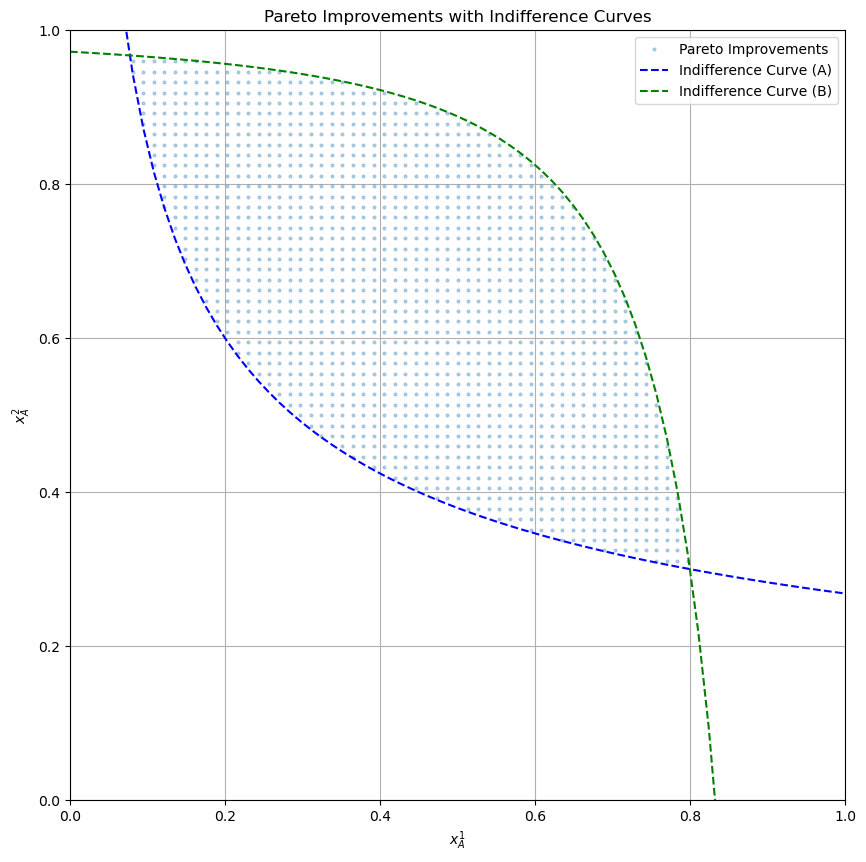

In [35]:
plt.figure(figsize=(10, 10))
plt.plot(pareto_improvements[:, 0], pareto_improvements[:, 1], 'o', markersize=2, alpha=0.3, label='Pareto Improvements')
plt.plot(indifference_curve_A[0], indifference_curve_A[1], 'b--', label='Indifference Curve (A)')
plt.plot(1 - indifference_curve_B[0], 1 - indifference_curve_B[1], 'g--', label='Indifference Curve (B)')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.title('Pareto Improvements with Indifference Curves')
plt.xlabel('$x_A^1$')
plt.ylabel('$x_A^2$')
plt.legend()
plt.grid(True)
plt.show()

# Opgave 2

Define constant

In [36]:
P1 = np.linspace(0.5, 2.5, N)
p2 = 1  # Numeraire

Definining the demand functions 

In [37]:
# Demand functions
def demand_A1(p1, omega_A1=omega_A1, alpha=alpha, p2=p2):
    return alpha * (omega_A1 * p1 + omega_A2 * p2) / p1

def demand_A2(p1, omega_A2=omega_A2, alpha=alpha, p2=p2):
    return (1 - alpha) * (omega_A1 * p1 + omega_A2 * p2) / p2

def demand_B1(p1, omega_B1=1-omega_A1, beta=beta, p2=p2):
    return beta * (omega_B1 * p1 + (1 - omega_A2) * p2) / p1

def demand_B2(p1, omega_B2=1-omega_A2, beta=beta, p2=p2):
    return (1 - beta) * (omega_B1 * p1 + (1 - omega_A2) * p2) / p2

Calculate market clearing errors

In [38]:
errors = []
for p1 in P1:
    xA1_star = demand_A1(p1)
    xA2_star = demand_A2(p1)
    xB1_star = demand_B1(p1)
    xB2_star = demand_B2(p1)
    
    epsilon1 = xA1_star + xB1_star - 1  # Since omega_A1 + omega_B1 = 1
    epsilon2 = xA2_star + xB2_star - 1  # Since omega_A2 + omega_B2 = 1
    
    errors.append((p1, epsilon1, epsilon2))

# Convert errors to a numpy array for easier handling
errors_np = np.array(errors)

# Display first 5 errors for a quick check
print(errors_np[:5])

[[ 0.5         0.53333333 -0.26666667]
 [ 0.52702703  0.47521368 -0.25045045]
 [ 0.55405405  0.42276423 -0.23423423]
 [ 0.58108108  0.3751938  -0.21801802]
 [ 0.60810811  0.33185185 -0.2018018 ]]


# Opgave 3

Calculate the market clearing price

In [39]:
# Assuming the structure of errors_np is [p1, epsilon1, epsilon2]
p1_values = errors_np[:, 0]
epsilon1_errors = errors_np[:, 1]

# Finding the index of the minimum absolute epsilon1 error
min_error_index = np.argmin(np.abs(epsilon1_errors))

# Finding the market clearing price p1 using the index
market_clearing_price_p1 = p1_values[min_error_index]

market_clearing_price_p1

0.9324324324324325

Okay, so the price which clears the market is 0.9324324324324325. Meaning it is the price which leads to the smallest market clearing errror. In other words, with this price we distrubete almost all of the goods in the market to the two consumers, so very little is wasted. 

# Opgave 4a

Definer 

In [40]:
def utility_A(p1):
    """Calculate consumer A's utility for a given price p1."""
    xA1 = demand_A1(p1)
    xA2 = demand_A2(p1)
    return uA(xA1, xA2)

# Assuming P1 is previously defined and alpha is a global variable
utilities_A = [utility_A(p1) for p1 in P1]
max_utility_index = np.argmax(utilities_A)
optimal_p1_for_A = P1[max_utility_index]

In [41]:
# Calculate allocations for consumer A at the optimal p1
xA1_optimal_allocation = demand_A1(optimal_p1_for_A)
xA2_optimal_allocation = demand_A2(optimal_p1_for_A)

# Print the optimal price p1 and allocations
print(f"Optimal price p1: {optimal_p1_for_A}")
print(f"Consumer A's optimal allocation for good 1: {xA1_optimal_allocation}")
print(f"Consumer A's optimal allocation for good 2: {xA2_optimal_allocation}")


Optimal price p1: 2.5
Consumer A's optimal allocation for good 1: 0.30666666666666664
Consumer A's optimal allocation for good 2: 1.5333333333333334


OBS: How can consumer A´s optimal allocarion for good 2 be more than 1, if a good is defined to be at most 1. 

The price of p1 that maximixes her utility is 2.5. Her optimal allocations of the goods favors the cheaper good 2, which makes sence. When the price of good 1 increases, she substitutes away from good 1 towards good 2, which remains cheaper.

# Opgave 4b

Max with no bonds for positive values of p1

In [42]:
def objective_function(p1):
    # Ensure p1 is positive
    if p1 <= 0:
        return float('inf')  # Return a high value if p1 is non-positive
    xA1 = demand_A1(p1)
    xA2 = demand_A2(p1)
    return -uA(xA1, xA2)  # Negative utility since we're minimizing

# Initial guess for p1
initial_guess = [1]

# Bounds for p1 (must be positive)
bounds = [(0, None)]

# Perform the minimization
result = minimize(objective_function, initial_guess, bounds=bounds)

# Extract the optimal p1
optimal_p1 = result.x[0]

# Calculate optimal allocations using the optimal p1
xA1_optimal_allocation = demand_A1(optimal_p1)
xA2_optimal_allocation = demand_A2(optimal_p1)

# Print the results
print(f"Optimal price p1: {optimal_p1}")
print(f"Consumer A's optimal allocation for good 1: {xA1_optimal_allocation}")
print(f"Consumer A's optimal allocation for good 2: {xA2_optimal_allocation}")

Optimal price p1: 32853400334477.96
Consumer A's optimal allocation for good 1: 0.2666666666666697
Consumer A's optimal allocation for good 2: 17521813511721.783


Optimal price becomes really big, because there is no closing bond. We have said it to none. 

In [43]:
def objective_function(p1):
    xA1 = demand_A1(p1[0])  # Note: p1[0] is used because minimize passes an array
    xA2 = demand_A2(p1[0])
    return -uA(xA1, xA2)  # Minimize the negative utility to maximize utility

# Initial guess for p1, within the desired range
initial_guess = [1.5]  # Midpoint of the range 0.5 to 2.5 as a reasonable starting point

# Corrected bounds for p1 to be within 0.5 and 2.5
bounds = [(0.5, 2.5)]

# Perform the minimization with corrected bounds
result = minimize(objective_function, initial_guess, bounds=bounds, method='SLSQP')  # Specifying a method that supports bounds

# Extract the optimal p1
optimal_p1 = result.x[0]

# Calculate optimal allocations using the optimal p1
xA1_optimal_allocation = demand_A1(optimal_p1)
xA2_optimal_allocation = demand_A2(optimal_p1)

# Print the results
print(f"Optimal price p1: {optimal_p1}")
print(f"Consumer A's optimal allocation for good 1: {xA1_optimal_allocation}")
print(f"Consumer A's optimal allocation for good 2: {xA2_optimal_allocation}")


Optimal price p1: 2.5
Consumer A's optimal allocation for good 1: 0.30666666666666664
Consumer A's optimal allocation for good 2: 1.5333333333333334


If I do it for all positive numbers of p1, but within the bonds from before, then I get the same optimal price ofc, because it max utility for consumer A. We are still under the assumption that A chooses the price to maximize her own utility.

# Opgave 5a

Define

In [46]:
# Define the objective function for A's utility to maximize
def objective_for_A(x):
    x1A, x2A = x  # A's consumption of good 1 and 2
    return -uA(x1A, x2A)  # Negative because we minimize in the solver

# Constraint ensuring B is not worse off than at their initial endowment
constraints = ({'type': 'ineq','fun': lambda x: uB(1 - x[0], 1 - x[1]) - initial_uB})  # B's utility - initial utility. 

# Bounds to ensure non-negative consumption
bounds = ((0, omega_A1), (0, omega_A2))

# Initial guess for the optimization
initial_guess = [omega_A1, omega_A2]

# Perform the optimization
result = minimize(objective_for_A,initial_guess,method='SLSQP',bounds=bounds,constraints=constraints)

if result.success:
    optimal_x1A = result.x[0]
    optimal_x2A = result.x[1]
    print(f"Optimal allocation for A: x1A = {optimal_x1A}, x2A = {optimal_x2A}")
    print(f"Remaining allocation for B: x1B = {1 - optimal_x1A}, x2B = {1 - optimal_x2A}")
else:
    print("Optimization was not successful.")


Optimal allocation for A: x1A = 0.8, x2A = 0.3
Remaining allocation for B: x1B = 0.19999999999999996, x2B = 0.7


Note: 'type': 'ineq': This specifies that the constraint is an inequality type. In the context of scipy.optimize, an inequality constraint is defined as a function g(x) that must be non-negative (g(x)≥0) for all x in the domain. Combining this with 'fun': lambda x: uB(1 - x[0], 1 - x[1]) - initial_uB, gives us the constraint uB(1 - x[0], 1 - x[1]) - initial_uB >= 0 thus represents the requirement that Consumer B should not be worse off than they were initially.

Now Consumer A´s optimal allocation is x1A = 0.8, x2A = 0.3. Which give consumer B an optimal allication on x1B = 0.19999999999999996, x2B = 0.7. Notice the bounds in this case i restricted, compared to question 5b.

# Opgave 5b

In [47]:
# Utility function for consumer A (Cobb-Douglas form)
def uA(x1, x2, alpha=alpha):
    return (x1 ** alpha) * (x2 ** (1 - alpha))

# Utility function for consumer B (Cobb-Douglas form)
def uB(x1, x2, beta=beta):
    return (x1 ** beta) * (x2 ** (1 - beta))

# Calculate initial utility for B with their endowment
initial_uB = uB(1 - omega_A1, 1 - omega_A2, beta)

# Define the objective function for Consumer A's utility
def objective_for_A(x):
    return -uA(x[0], x[1])  # We minimize the negative utility since the optimizer can only minimize

# Constraints ensuring B's utility is at least as much as the utility from their endowment
constraints = [{'type': 'ineq', 'fun': lambda x: uB(1 - x[0], 1 - x[1], beta) - initial_uB}]

# Bounds to ensure A's consumption is non-negative and does not exceed total resources
bounds = [(0, 1), (0, 1)]

# Initial guess: A's consumption starts at their endowment
initial_guess = [omega_A1, omega_A2]

# Optimization for A's utility maximization
result = minimize(
    objective_for_A, 
    initial_guess, 
    method='SLSQP', 
    bounds=bounds, 
    constraints=constraints
)

# Extract the optimal allocations
if result.success:
    optimal_x1A = result.x[0]
    optimal_x2A = result.x[1]
    optimal_x1B = 1 - optimal_x1A
    optimal_x2B = 1 - optimal_x2A
    print(f"Optimal allocation for A: x1A = {optimal_x1A}, x2A = {optimal_x2A}")
    print(f"Optimal allocation for B: x1B = {optimal_x1B}, x2B = {optimal_x2B}")
else:
    print("Optimization failed. The reason for failure:", result.message)



Optimal allocation for A: x1A = 0.5757450601538892, x2A = 0.8444377859258702
Optimal allocation for B: x1B = 0.42425493984611085, x2B = 0.15556221407412985


The optimal allocation for A: x1A = 0.5757450601538892, x2A = 0.8444377859258702, which leave B with an optimal allocation: x1B = 0.42425493984611085, x2B = 0.15556221407412985. The allocation ahs changed from 5a. 

# opgave 6

Assume utility functions uA and uB have already been defined, as well as alpha and beta.

In [49]:
# Define the aggregate utility function to be maximized by the social planner
def aggregate_utility(x, alpha, beta):
    # Utility for A given their consumption x
    uA_val = uA(x[0], x[1], alpha)
    # Utility for B given their consumption (1-x because the total amount available is normalized to 1)
    uB_val = uB(1 - x[0], 1 - x[1], beta)
    # The social planner aims to maximize the sum of utilities
    return -(uA_val + uB_val)  # Negative for minimization

# Define the bounds for the optimization problem
# x[0] and x[1] cannot be negative or exceed 1, representing 100% of the resource
bounds = [(0, 1), (0, 1)]

# Define an initial guess for the optimization
# We can start with an equal division of the resources as a reasonable guess
initial_guess = [0.5, 0.5]

# Perform the optimization to maximize aggregate utility
result = minimize(
    aggregate_utility,
    initial_guess,
    args=(alpha, beta),
    method='SLSQP',
    bounds=bounds
)

# Check if the optimization was successful and print the results
if result.success:
    optimal_x1A = result.x[0]
    optimal_x2A = result.x[1]
    # B's allocation is the remainder of the total endowment
    optimal_x1B = 1 - optimal_x1A
    optimal_x2B = 1 - optimal_x2A
    print(f"Optimal allocation for A: x1A = {optimal_x1A}, x2A = {optimal_x2A}")
    print(f"Optimal allocation for B: x1B = {optimal_x1B}, x2B = {optimal_x2B}")
else:
    print("Optimization failed. The reason:", result.message)



Optimal allocation for A: x1A = 0.33341166147388446, x2A = 0.6665883190561481
Optimal allocation for B: x1B = 0.6665883385261155, x2B = 0.3334116809438519


Again we notive that the optimal allocation have changed, when we introduce a social planner. 